In [1]:
from engine.vector_backtest_engine import VectorBacktestEngine
from factor_manager.factor_miner.momentum import Momentum
from factor_manager.factor_miner.doubleMA import DoubleMA
from factor_manager.factor_miner.rsi import RSI
from factor_manager.factor_miner.kdj import KDJ
from factor_manager.factor_miner.rumi import RUMI
from portfolio_manager.portfolio_template import get_portfolio_pnl
import argparse

In [2]:
def get_args_with_batch_id(batch_id: int) -> argparse.Namespace:
    """
    Get command line arguments with default values based on the provided batch_id.

    Parameters:
        batch_id (int): Identifier for selecting a specific set of default arguments.

    Returns:
        argparse.Namespace: Parsed command line arguments.
    """
    
    parser = argparse.ArgumentParser()
    parser.add_argument("--factor_name", "-m", default="Momentum", help="Factor name")
    parser.add_argument("--model_type", type=str, default="rule_based", help="Model type")
    parser.add_argument("--model_name", type=str, default="vote", help="Model name")
    parser.add_argument("--back_window", type=int, default=1000, help="Number of trading days for train data")
    parser.add_argument("--target_type", type=str, default="tag_raw", help="tag_raw or tag_ranked in model prediction")
    parser.add_argument("--with_pca", type=bool, default=False, help="PCA in model training")
    parser.add_argument("--trade_type", type=str, default='long_short', help="Long only or long short in signal evaluation")
    parser.add_argument("--upper_bound", type=float, default=0.5, help="Upper bound of signal to weight")
    parser.add_argument("--lower_bound", type=float, default=0.5, help="Lower bound of signal to weight")
    parser.add_argument("--model_id", type=str, default="vote", help="Model id created from Model name")
    args = parser.parse_args()

    if batch_id == 1:
        args.model_type = 'rule_based'
        args.model_name = 'vote'
        args.target_type = 'tag_raw'   
        args.with_pca = False
        args.model_id = 'vote'

    elif batch_id == 2:
        args.model_type = 'rule_based'
        args.model_name = 'equal_weight'
        args.target_type = 'tag_raw'   
        args.with_pca = False
        args.model_id = 'equal_weight'
    
    elif batch_id == 3:
        args.model_type = 'prediction_based'
        args.model_name = 'OLSLRModel'
        args.target_type = 'tag_raw'   
        args.with_pca = False
        args.model_id = 'OLSLRModel'
        
    elif batch_id == 4:
        args.model_type = 'prediction_based'
        args.model_name = 'OLSLRModel'
        args.target_type = 'tag_raw'   
        args.with_pca = True
        args.model_id = 'OLSLRModel_PCA'
        
    elif batch_id == 5:
        args.model_type = 'prediction_based'
        args.model_name = 'LogisticModel'
        args.target_type = 'tag_class'
        args.with_pca = False
        args.model_id = 'LogisticModel_tag_class'
          
    return args

高相关因子融合

2024-01-02 11:22:05.288 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000016.parquet
2024-01-02 11:22:05.290 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0             1             2             3            4
ts_code       000016.SH     000016.SH     000016.SH     000016.SH    000016.SH
trade_date     20040102      20040105      20040106      20040107     20040108
close          1011.347      1060.801      1075.656      1086.303     1102.662
open            996.996      1008.279      1059.141      1075.562      1087.68
high           1021.568      1060.898      1086.694      1095.841     1108.291
low             993.892      1008.279      1059.095       1070.98     1082.509
pre_close        1000.0      1011.347      1060.801      1075.656     1086.303
change           11.347        49.454        14.855        10.647       16.359
pct_chg          1.1347        4.8

2024-01-02 11:22:05.311 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/factors/stock_index/momentum/000016.parquet
2024-01-02 11:22:05.313 | INFO     | data_manager.data_loader:load_data_by_file:16 -                     0         1         2         3         4
trade_date   20040102  20040105  20040106  20040107  20040108
momentum_1   0.011347  0.048899  0.014004  0.009898  0.015059
momentum_5        NaN       NaN       NaN       NaN  0.019841
momentum_10       NaN       NaN       NaN       NaN       NaN
momentum_20       NaN       NaN       NaN       NaN       NaN
momentum_40       NaN       NaN       NaN       NaN       NaN
momentum_60       NaN       NaN       NaN       NaN       NaN


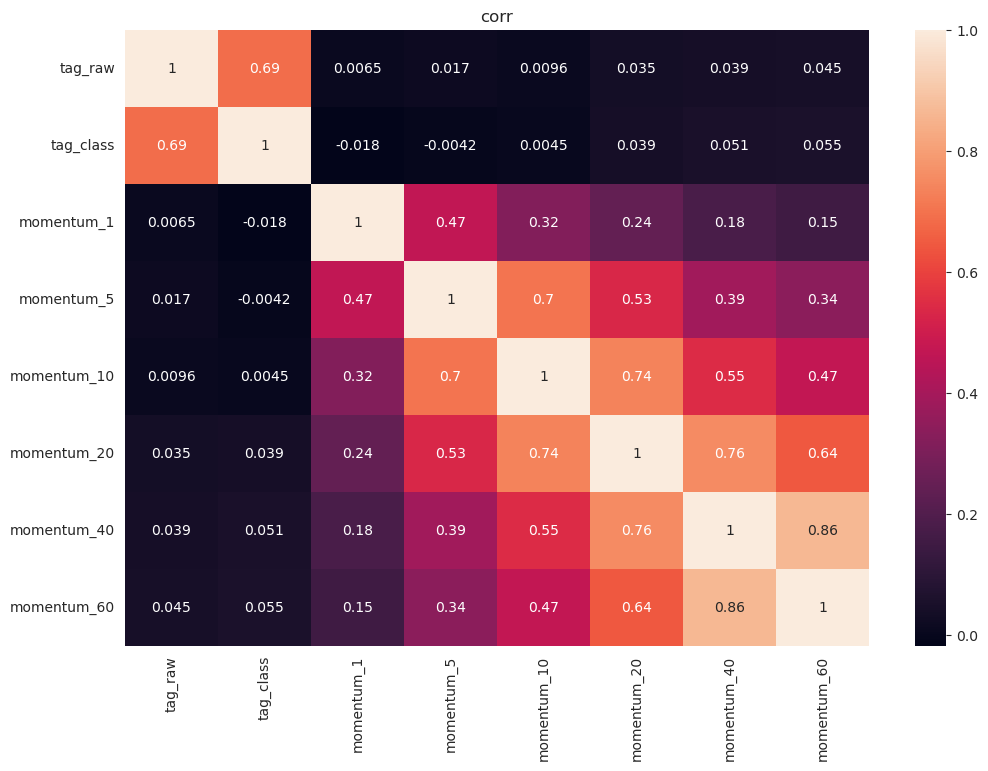

2024-01-02 11:22:16.166 | INFO     | engine.vector_backtest_engine:vector_backtest:80 -                                000016.SH_benchmark  000016.SH_equal_weight  \
annualized return                         0.075339                0.160996   
sharpe ratio                              0.291962                0.624288   
win ratio                                 0.502988                0.511848   
win per loss                              1.042277                1.068998   
annualized turnover(buy side)                  NaN               43.496601   
annualized costs                               NaN                0.020008   

                               000016.SH_OLSLRModel  000016.SH_OLSLRModel_PCA  
annualized return                         -0.004658                  0.005223  
sharpe ratio                              -0.018314                  0.020563  
win ratio                                  0.501429                  0.515081  
win per loss                               0.

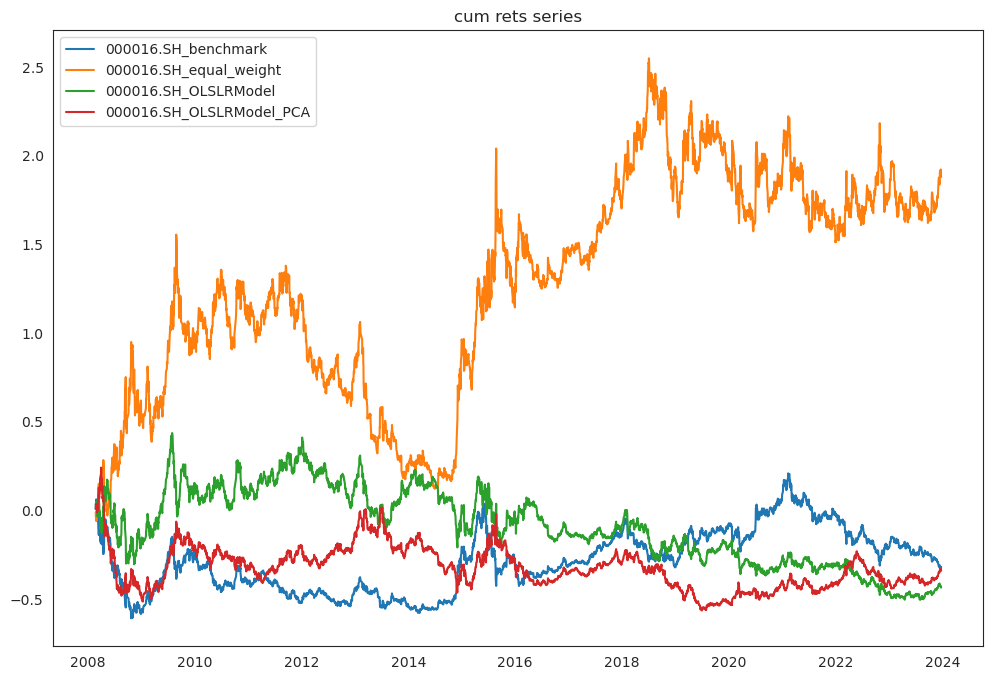

2024-01-02 11:22:16.534 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000300.parquet
2024-01-02 11:22:16.535 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1           2            3           4
ts_code       000300.SH    000300.SH   000300.SH    000300.SH   000300.SH
trade_date     20050104     20050105    20050106     20050107    20050110
close           982.794      992.564     983.174      983.958     993.879
open            994.769      981.577     993.331      983.045      983.76
high            994.769      997.323     993.788      995.711     993.959
low             980.658      979.877      980.33      979.812     979.789
pre_close        1000.0      982.794     992.564      983.174     983.958
change          -17.206         9.77       -9.39        0.784       9.921
pct_chg         -1.7206       0.9941      -0.946       0.0797      1.0083
vol  

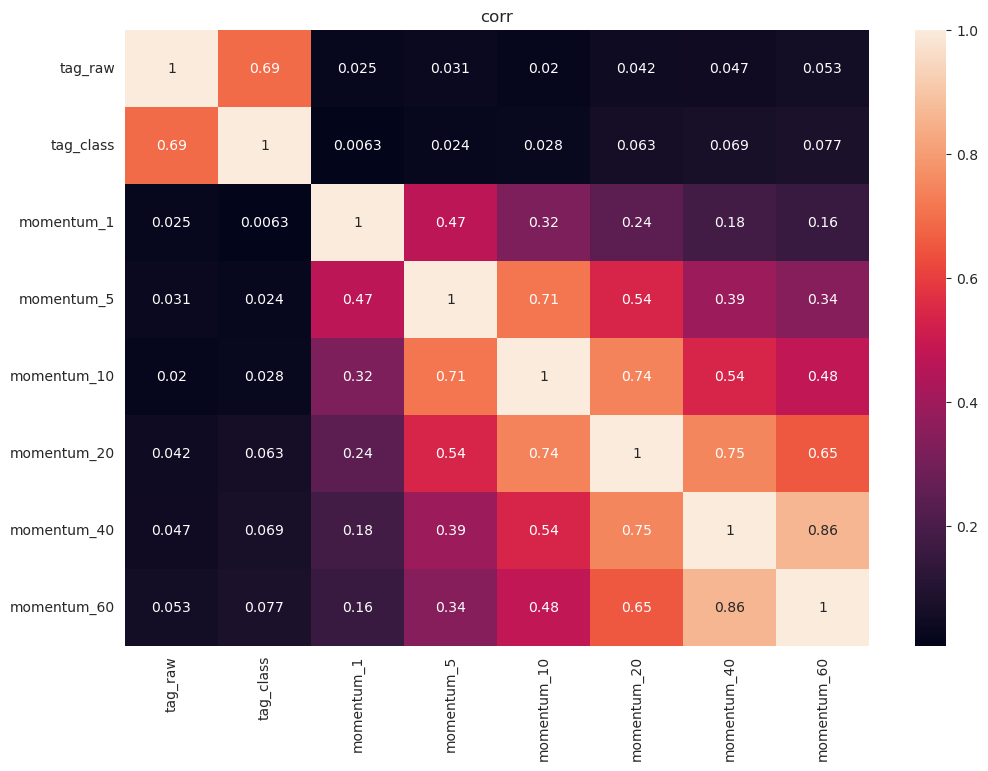

2024-01-02 11:22:23.956 | INFO     | engine.vector_backtest_engine:vector_backtest:80 -                                000300.SH_benchmark  000300.SH_equal_weight  \
annualized return                         0.100325                0.195356   
sharpe ratio                              0.388583                0.757293   
win ratio                                 0.525380                0.520607   
win per loss                              0.969576                1.056933   
annualized turnover(buy side)                  NaN               44.695577   
annualized costs                               NaN                0.020560   

                               000300.SH_OLSLRModel  000300.SH_OLSLRModel_PCA  
annualized return                         -0.094177                 -0.017955  
sharpe ratio                              -0.413429                 -0.078867  
win ratio                                  0.503192                  0.514840  
win per loss                               0.

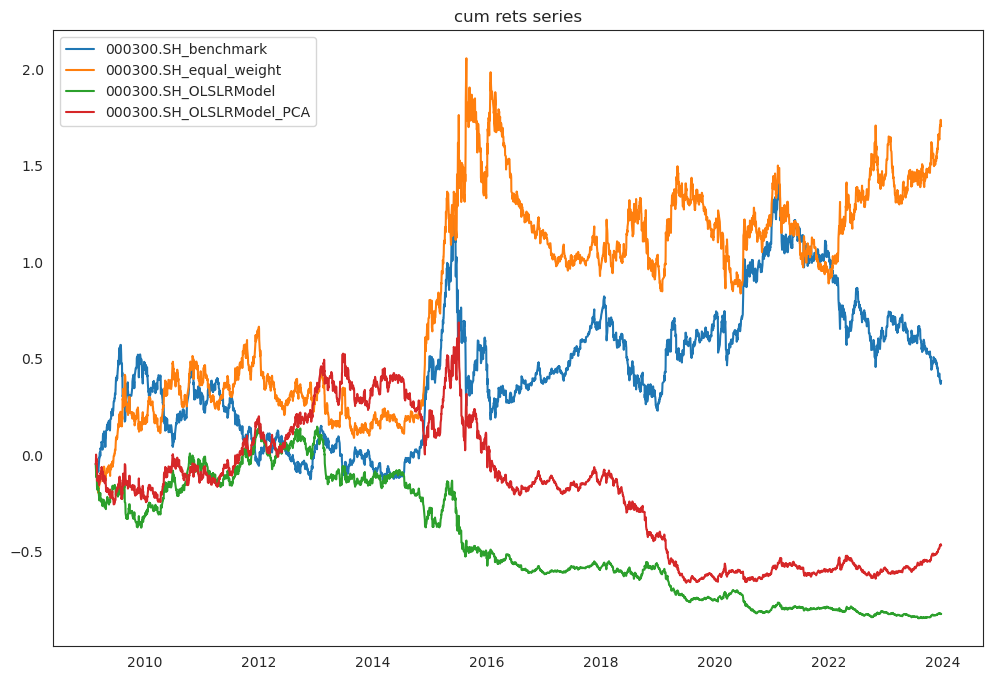

2024-01-02 11:22:24.298 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000905.parquet
2024-01-02 11:22:24.300 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1            2            3            4
ts_code       000905.SH    000905.SH    000905.SH    000905.SH    000905.SH
trade_date     20050104     20050105     20050106     20050107     20050110
close           986.927     1003.633      994.595      997.606     1006.337
open            996.682       986.57      1003.49      993.434      996.928
high            996.682     1008.855      1003.49       1009.0     1006.457
low             984.795      985.677      990.792      990.446      993.123
pre_close        1000.0      986.927     1003.633      994.595      997.606
change          -13.073       16.706       -9.038        3.011        8.731
pct_chg         -1.3073       1.6927      -0.9005       0.302

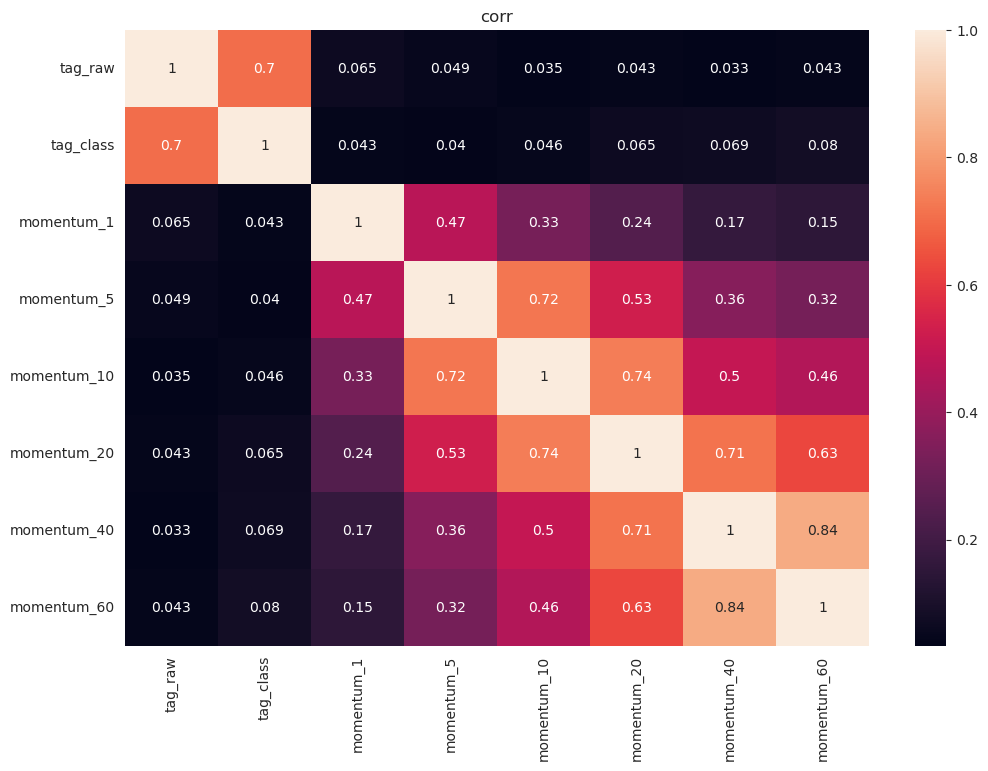

2024-01-02 11:22:31.842 | INFO     | engine.vector_backtest_engine:vector_backtest:80 -                                000905.SH_benchmark  000905.SH_equal_weight  \
annualized return                         0.135136                0.256608   
sharpe ratio                              0.462162                0.878717   
win ratio                                 0.553796                0.534071   
win per loss                              0.875335                1.021403   
annualized turnover(buy side)                  NaN               42.673894   
annualized costs                               NaN                0.019630   

                               000905.SH_OLSLRModel  000905.SH_OLSLRModel_PCA  
annualized return                         -0.170574                 -0.105531  
sharpe ratio                              -0.663441                 -0.411360  
win ratio                                  0.478779                  0.489734  
win per loss                               0.

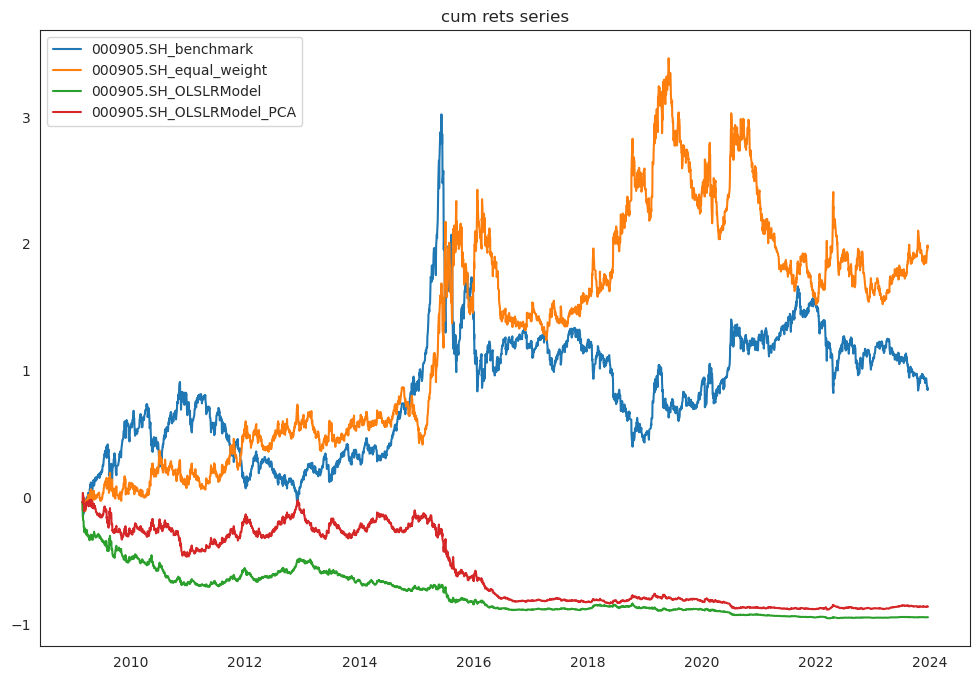

2024-01-02 11:22:32.165 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000852.parquet
2024-01-02 11:22:32.166 | INFO     | data_manager.data_loader:load_data_by_file:16 -                      0          1           2           3           4
ts_code      000852.SH  000852.SH   000852.SH   000852.SH   000852.SH
trade_date    20050104   20050105    20050106    20050107    20050110
close          989.984   1013.583    1005.465     1011.74    1023.638
open           996.278    989.873    1014.965    1005.515    1011.925
high           996.278   1018.261    1014.965    1021.706    1023.638
low            982.988    988.568    1001.213    1001.096    1007.802
pre_close       1000.0    989.984    1013.583    1005.465     1011.74
change         -10.016     23.599      -8.118       6.275      11.898
pct_chg        -1.0016     2.3838     -0.8009      0.6241       1.176
vol          494737.55  822661.44   732454.01

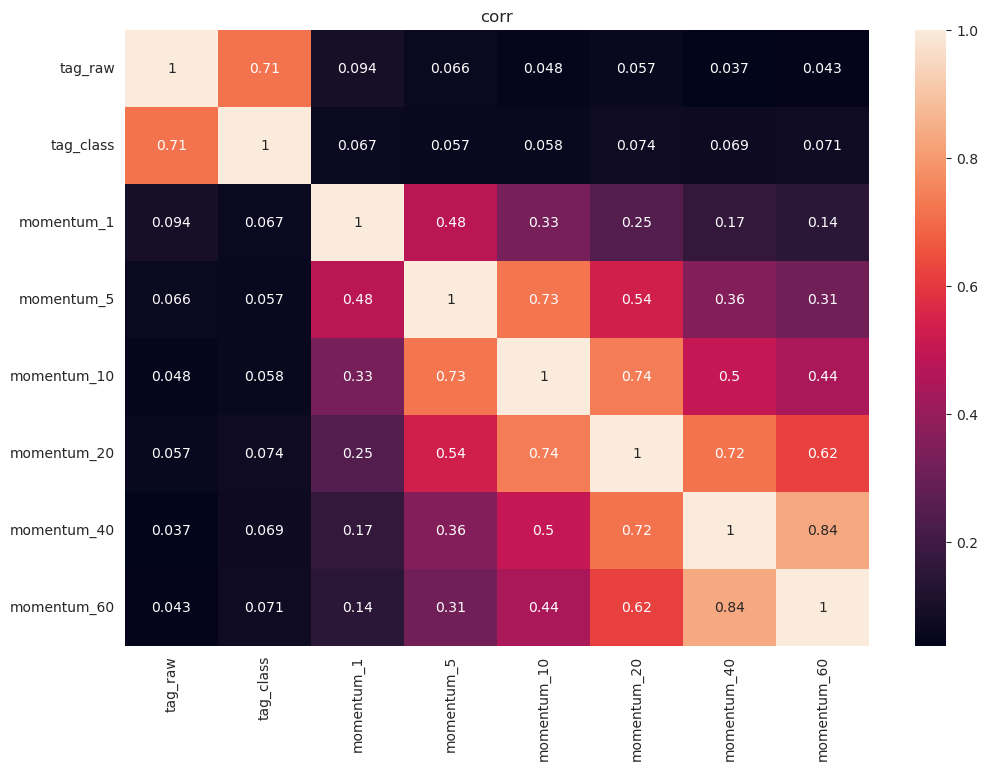

2024-01-02 11:22:39.219 | INFO     | engine.vector_backtest_engine:vector_backtest:80 -                                000852.SH_benchmark  000852.SH_equal_weight  \
annualized return                         0.142447                0.323040   
sharpe ratio                              0.469628                1.066957   
win ratio                                 0.560304                0.537744   
win per loss                              0.852614                1.037995   
annualized turnover(buy side)                  NaN               40.761492   
annualized costs                               NaN                0.018750   

                               000852.SH_OLSLRModel  000852.SH_OLSLRModel_PCA  
annualized return                         -0.130862                 -0.063627  
sharpe ratio                              -0.480081                 -0.233722  
win ratio                                  0.483629                  0.488759  
win per loss                               0.

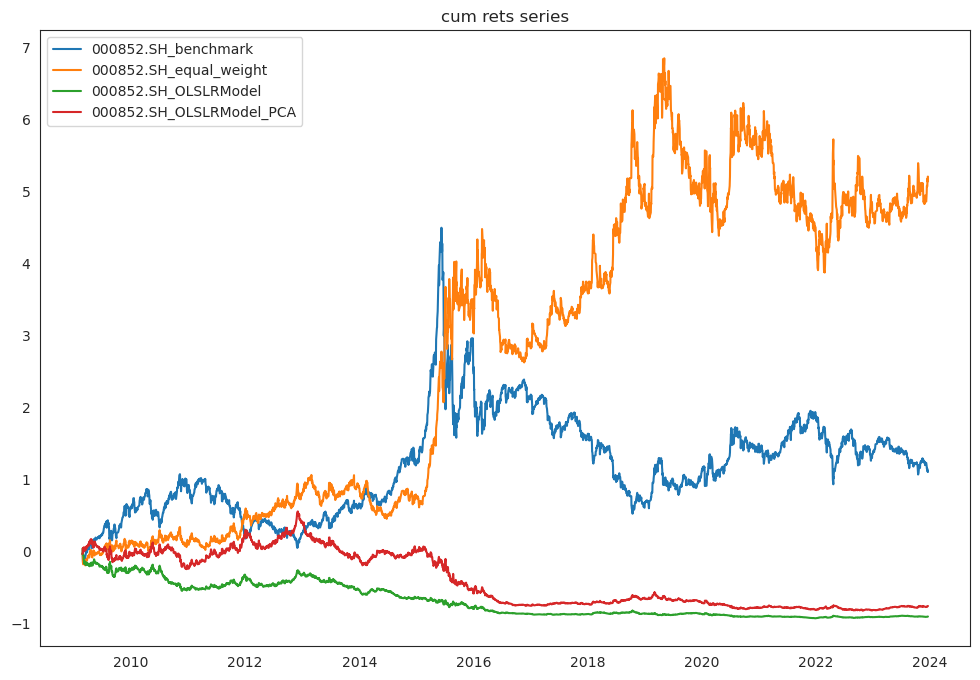

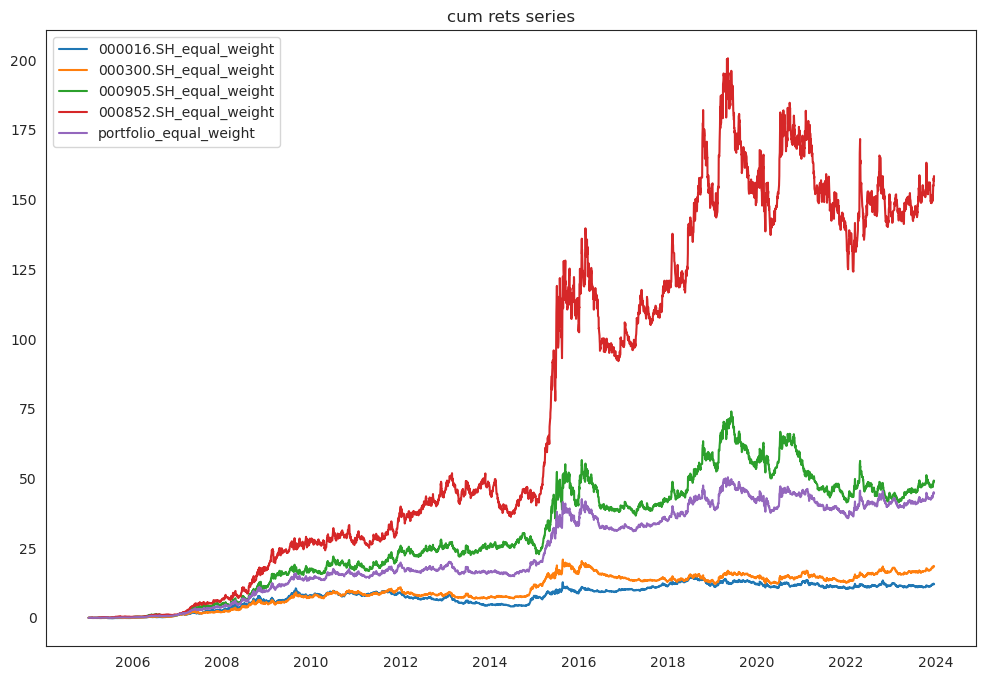

In [3]:
factor_classes = [Momentum]
myvbe = VectorBacktestEngine(factor_classes)

contracts = ['000016.SH', '000300.SH', '000905.SH', '000852.SH']
args_list = [get_args_with_batch_id(batch_id) for batch_id in [2, 3, 4]]

dict_pnl = myvbe.vector_backtest(contracts, args_list)

get_portfolio_pnl(dict_pnl, contracts, chosen_model_id = 'equal_weight')